Equalling net and loss power expression leads to:
\begin{equation}
n \tau_E 
\geqslant
C_{lawson}
\frac{Q}{1+Q/\lambda}
\frac{\hat T }{\left< \sigma v \right>_{DT} }
\end{equation} 


The D-T fusion reactivity depends of the temperature and peaks around $T \approx 66.5$ keV. Few empirical formulas or tabulations have been proposed, which can be found for instance the Bosch-Hale parametrization [Hartwig2016] or the Brunelli [FusionCEA1987]:

\begin{equation}
\left< \sigma v \right>_{DT} \approx 9.10^{-22}
\exp\left\{ -0.476 \left| \ln\frac{\hat T}{69} \right|^{2.25}\right\}
\;\;\;\textrm{m}^3.\textrm{s}^{-1}
\end{equation}

In [8]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import e

In [18]:
def avg_sigmav_DT(T_keV):
    'return the average D-T fusion reactivity in m^3/s'
    return 9e-22 * np.exp(-0.476 * np.abs(np.log(T_keV/69))**2.25)

def ntau_e(T_keV, Q=10, lambd=5):
    E_DT_MeV = 17.59 # MeV
    E_DT = 2.82e-12 # J
    C_lawson = 12*1e3*e/E_DT
    return C_lawson * Q/(1+Q/lambd) * T_keV/ avg_sigmav_DT(T_keV)

<IPython.core.display.Javascript object>


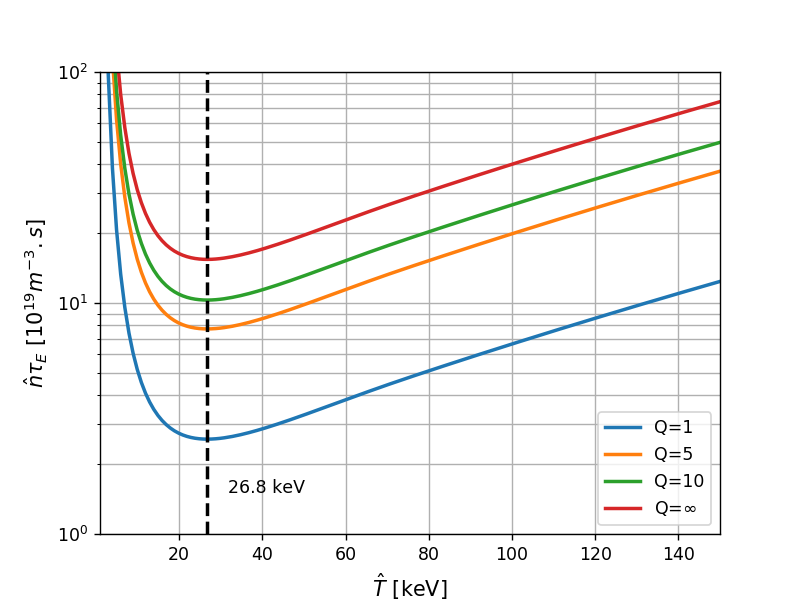

(1, 150)

In [54]:
T_keV = np.linspace(2, 150, num=150)
ntau_Q1 = ntau_e(T_keV, Q=1)
ntau_Q5 = ntau_e(T_keV, Q=5)
ntau_Q10 = ntau_e(T_keV, Q=10)
ntau_Qinf = ntau_e(T_keV, Q=100000)

T_opt = T_keV[np.argmin(ntau_Q10)]

fig, ax = plt.subplots()
ax.semilogy(T_keV, ntau_Q1/1e19, lw=2, label='Q=1')
ax.semilogy(T_keV, ntau_Q5/1e19, lw=2, label='Q=5')
ax.semilogy(T_keV, ntau_Q10/1e19, lw=2, label='Q=10')
ax.semilogy(T_keV, ntau_Qinf/1e19, lw=2, label='Q=$\infty$')
ax.grid(True)
ax.grid(True, which='minor')
ax.set_xlabel('$\hat T$ [keV]', fontsize=12)
ax.set_ylabel(r'$\hat n \tau_E$ [$10^{19} m^{-3}.s$]', fontsize=12)
ax.set_ylim(1, 100)
ax.legend(loc='lower right')
ax.axvline(T_opt, ls='--', color='k', lw=2)
ax.text(T_opt+5, 1.5, f'{T_opt:.1f} keV')
ax.set_xlim(1, 150)

In [55]:
fig.savefig('ntau_e_vs_T.png', dpi=150)